## MS1

### Intro Content and Downloads

In [100]:
from herbie import Herbie, FastHerbie
import pandas as pd, numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs, cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy
import metpy.calc as mpcalc
from datetime import datetime, timedelta, time, timezone
import matplotlib.colors

### Loading Herbie functions

In [101]:
run = pd.Timestamp("2024-01-13T00", tz="utc").replace(tzinfo=None).floor('24h')

In [102]:
H = FastHerbie([run], model="ifs", product="oper", fxx=np.arange(0,252,12).tolist(), save_dir='~/meteo473_groupwork/group2/data/')

In [4]:
ss = r":gh:500:"

In [5]:
ds = H.xarray(ss)
ds

👨🏻‍🏭 Created directory: [/home/meteo/hth5069/data/ifs/20240113]


<xarray.Dataset> Size: 34MB
Dimensions:              (step: 21, latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-13
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 4kB 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude            (longitude) float64 7kB -180.0 -179.6 ... 179.2 179.6
    valid_time           (step) datetime64[ns] 168B 2024-01-13 ... 2024-01-23
    gribfile_projection  object 8B None
Data variables:
    gh                   (step, latitude, longitude) float32 34MB 5.168e+03 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

In [8]:
ds.to_netcdf("./data/modelrun.nc")

### Open Dataset

In [103]:
ds = xr.open_dataset("./data/modelrun.nc")
ss = r":gh:500:"

### Verification

In [104]:
def verifset(y,m,d,h):
    """ Returns a ECMWF verification dataset of 10 days from the specified run date. """
    init = datetime(y,m,d,h)
    fhr = 12
    timeindex = 21
    atimes = []
    newdt = init
    atimes.append(newdt)
    for x in range(0, timeindex):
        newdt = newdt+timedelta(hours=fhr)
        atimes.append(newdt)
    fhr0=[]
    for x in range(0, timeindex):
        newinit = Herbie(atimes[x], model="ifs", product="oper", fxx=0, overwrite=True, save_dir="./data")
        fhr0.append(newinit)
    return fhr0

In [105]:
fhr0 = verifset(2024,1,13,0)
# The function 'verifset' automates the model reanalysis process, when a run date and time are entered the function returns a dataset that is 10 days from the entered date.

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-13 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-13 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-14 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-14 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-15 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-15 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-16 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-16 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-17 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-17 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-18 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊

### Reanalysis (attempt)

In [106]:
#obtaining reanalysis datasets - downloaded into the downloads folder
reanalysis = xr.open_dataset('/home/meteo/mvm6933/meteo473_groupwork/group2/data/Reanalysisdataset.grib')
reanalysis
#need to regrid and then apply to maps

<xarray.Dataset> Size: 4MB
Dimensions:        (time: 38, latitude: 113, longitude: 241)
Coordinates:
    number         int64 8B ...
  * time           (time) datetime64[ns] 304B 2024-01-13 ... 2024-01-31T12:00:00
    step           timedelta64[ns] 8B ...
    isobaricInhPa  float64 8B ...
  * latitude       (latitude) float64 904B 50.0 49.75 49.5 ... 22.5 22.25 22.0
  * longitude      (longitude) float64 2kB -125.0 -124.8 -124.5 ... -65.25 -65.0
    valid_time     (time) datetime64[ns] 304B ...
Data variables:
    z              (time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-12T10:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [107]:
conusslice0z = reanalysis.sel(time='2024-01-13T00:00:00').sel(latitude=slice(50,22), longitude=slice(-125,-65))
conusslice0z.z

<xarray.DataArray 'z' (latitude: 113, longitude: 241)> Size: 109kB
[27233 values with dtype=float32]
Coordinates:
    number         int64 8B ...
    time           datetime64[ns] 8B 2024-01-13
    step           timedelta64[ns] 8B ...
    isobaricInhPa  float64 8B ...
  * latitude       (latitude) float64 904B 50.0 49.75 49.5 ... 22.5 22.25 22.0
  * longitude      (longitude) float64 2kB -125.0 -124.8 -124.5 ... -65.25 -65.0
    valid_time     datetime64[ns] 8B ...
Attributes: (12/31)
    GRIB_paramId:                             129
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      27233
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           z
    GRIB_totalNumber:                         0
    GRIB_units:                               m**2 s**-2
    long_name:                                Geopotential
    units:                                    m**2 s**-2
    standard_name:                            geopotential

In [108]:
#create subsets for CONUS
runsubset = ds.sel(latitude=slice(50,22), longitude=slice(-125,-65))
runsubset

<xarray.Dataset> Size: 884kB
Dimensions:              (step: 21, latitude: 70, longitude: 150)
Coordinates:
    time                 datetime64[ns] 8B ...
  * step                 (step) timedelta64[ns] 168B 0 days 00:00:00 ... 10 d...
    isobaricInhPa        float64 8B ...
  * latitude             (latitude) float64 560B 50.0 49.6 49.2 ... 22.8 22.4
  * longitude            (longitude) float64 1kB -124.8 -124.4 ... -65.6 -65.2
    valid_time           (step) datetime64[ns] 168B ...
    gribfile_projection  float64 8B ...
Data variables:
    gh                   (step, latitude, longitude) float32 882kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    search:                  :gh:500:

### Plotting

In [109]:
#custom colormap for gh at 500 mb using only blue and red hues

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

cdict = {
    'red': (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 1.0),
        (1.0, 0.1, 1.0),
    ),
    'green': (
        (0.0, 0.0, 0.0),
        (1.0, 0.0, 0.0),
    ),
    'blue': (
        (0.0, 0.0, 0.1),
        (0.5, 1.0, 0.0),
        (1.0, 0.0, 0.0),
    )
}
mpl.colormaps.register(LinearSegmentedColormap('BlRdMeg', cdict))

In [110]:
def mercplt(r,i):
    """ Returns a Miller basemap for data plotting given a row value and an index value. """
    dataproj=ccrs.PlateCarree()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(r, 1, i, projection=ccrs.Miller())
    ax.set_extent([-125, -65, 22, 50])
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linewidth=2)
    ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='black')
    gls=ax.gridlines(draw_labels=True, color="none")
    gls.right_labels=False
    gls.top_labels=False
    return ax
#I (Hunter) reuse code from assignment 5 that lets me create Miller plots quickly for data plotting.

Text(0.5, 1.0, 'ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-13 00z')

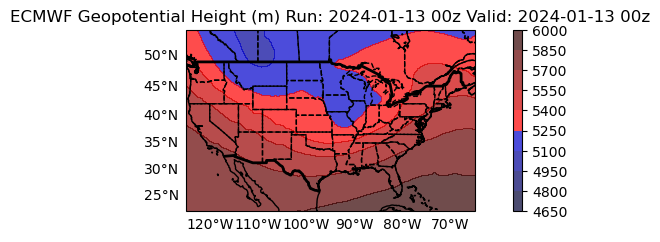

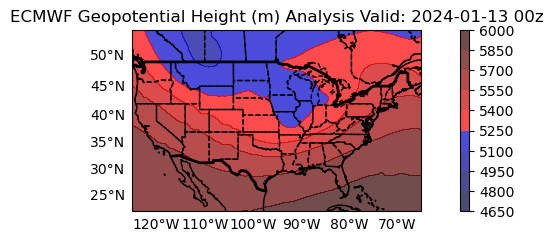

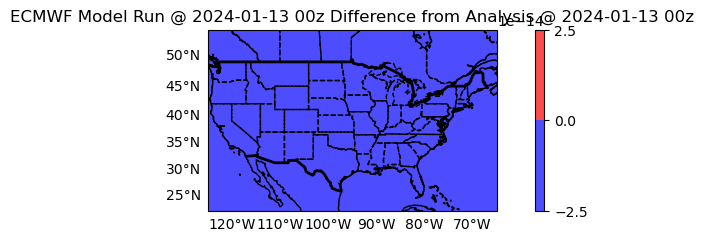

In [111]:
#plots
lat = ds.latitude.values
lon = ds.longitude.values
latsubset = conusslice0z.latitude.values
lonsubset = conusslice0z.longitude.values

#fetching the verification for fhr 0 (the two plots should be identical)
vfhr0=fhr0[0].xarray(ss)
verifsubset = vfhr0.sel(latitude=slice(22, 50), longitude=slice(-65, -125))

#print(ds['gh'].values.shape)
dataproj=ccrs.PlateCarree()
ax1 = mercplt(3,1)
mapgh = ax1.contourf(lon, lat, ds['gh'].values[0], transform=dataproj, cmap='BlRdMeg', alpha=0.7)
plt.colorbar(mapgh, shrink=1, aspect=20)
ax1.set_title('ECMWF Geopotential Height (m) Run: 2024-01-13 00z Valid: 2024-01-13 00z')
ax2 = mercplt(3,2)
verifgh = ax2.contourf(lon, lat, vfhr0.gh, transform=dataproj, cmap='BlRdMeg', alpha=0.7) 
plt.colorbar(verifgh, shrink=1, aspect=20)
ax2.set_title('ECMWF Geopotential Height (m) Analysis Valid: 2024-01-13 00z')
ax3 = mercplt(3,3)
diffgh = ax3.contourf(lon, lat, (vfhr0.gh-ds['gh'].values[0]), transform=dataproj, cmap='seismic', alpha=0.7)
plt.colorbar(diffgh, shrink=1, aspect=20)
ax3.set_title('ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-13 00z')
#We were able to fetch reanalysis data, but we were unable to plot it against the ECMWF runs due to lat/lon step differences.

Text(0.5, 1.0, 'ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-16 00z')

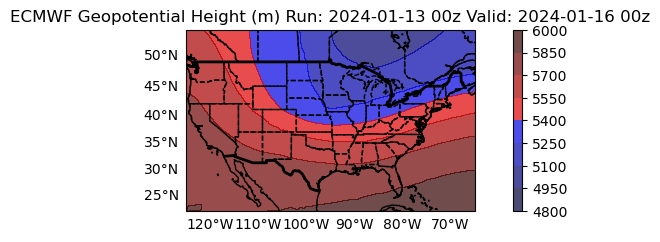

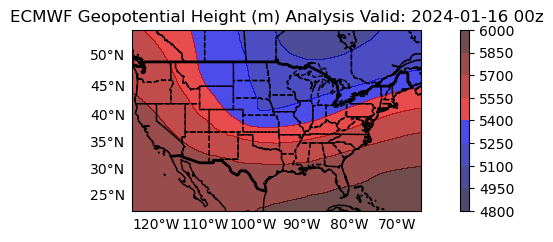

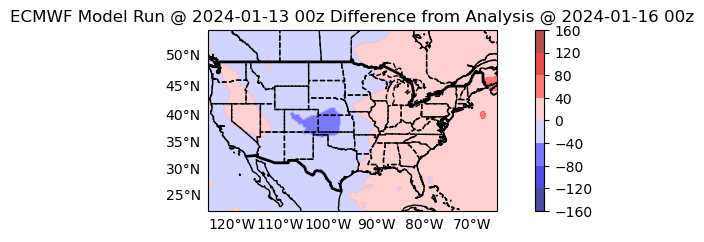

In [112]:
#72 hour verification
vfhr72 = fhr0[6].xarray(ss)
verifsubset = vfhr72.sel(latitude=slice(22, 50), longitude=slice(-65, -125))

dataproj=ccrs.PlateCarree()
ax1 = mercplt(3,1)
mapgh = ax1.contourf(lon, lat, ds['gh'].values[6], transform=dataproj, cmap='BlRdMeg', alpha=0.7) 
plt.colorbar(mapgh, shrink=1, aspect=20)
ax1.set_title('ECMWF Geopotential Height (m) Run: 2024-01-13 00z Valid: 2024-01-16 00z')
ax2 = mercplt(3,2)
ax2.set_title('ECMWF Geopotential Height (m) Analysis Valid: 2024-01-16 00z')
verifgh = ax2.contourf(lon, lat, vfhr72.gh, transform=dataproj, cmap='BlRdMeg', alpha=0.7)
plt.colorbar(verifgh, shrink=1, aspect=20)
ax3 = mercplt(3,3)
diffgh = ax3.contourf(lon, lat, (vfhr72.gh-ds['gh'].values[6]), transform=dataproj, cmap='seismic', alpha=0.7)
plt.colorbar(diffgh, shrink=1, aspect=20)
ax3.set_title('ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-16 00z')

Text(0.5, 1.0, 'ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-19 00z')

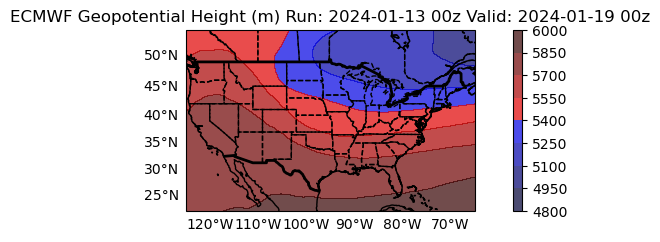

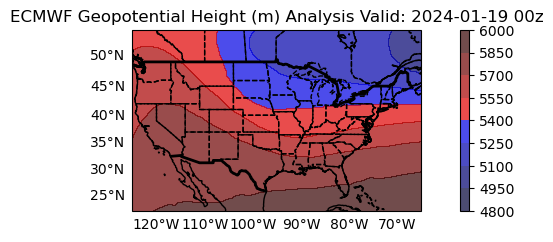

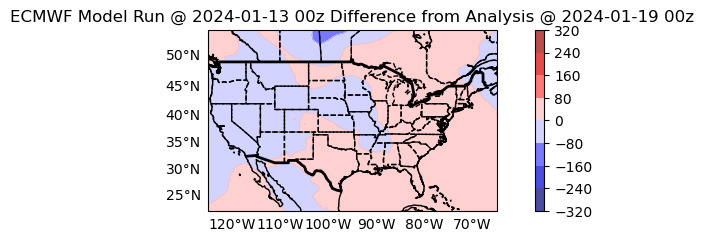

In [113]:
#144 hour verification
vfhr144 = fhr0[12].xarray(ss)
verifsubset = vfhr144.sel(latitude=slice(22, 50), longitude=slice(-65, -125))

dataproj=ccrs.PlateCarree()
ax1 = mercplt(3,1)
mapgh = ax1.contourf(lon, lat, ds['gh'].values[12], transform=dataproj, cmap='BlRdMeg', alpha=0.7) 
plt.colorbar(mapgh, shrink=1, aspect=20)
ax1.set_title('ECMWF Geopotential Height (m) Run: 2024-01-13 00z Valid: 2024-01-19 00z')
ax2 = mercplt(3,2)
verifgh = ax2.contourf(lon, lat, vfhr144.gh, transform=dataproj, cmap='BlRdMeg', alpha=0.7) 
plt.colorbar(verifgh, shrink=1, aspect=20)
ax2.set_title('ECMWF Geopotential Height (m) Analysis Valid: 2024-01-19 00z')
ax3 = mercplt(3,3)
diffgh = ax3.contourf(lon, lat, (vfhr144.gh-ds['gh'].values[12]), transform=dataproj, cmap='seismic', alpha=0.7)
plt.colorbar(diffgh, shrink=1, aspect=20)
ax3.set_title('ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-19 00z')

Text(0.5, 1.0, 'ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-23 00z')

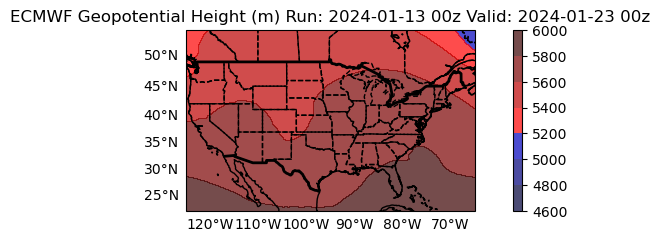

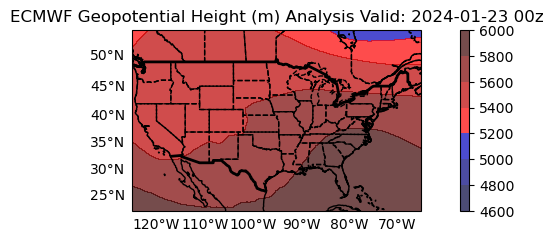

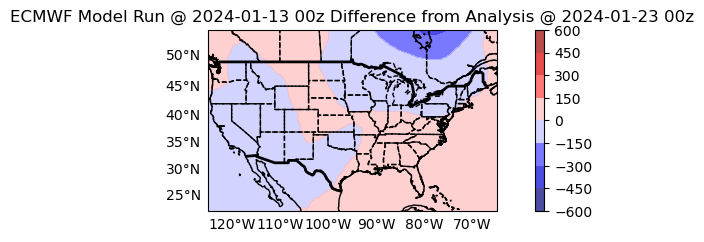

In [114]:
#240 hour verification
vfhr240 = fhr0[20].xarray(ss)
verifsubset = vfhr72.sel(latitude=slice(22, 50), longitude=slice(-65, -125))

dataproj=ccrs.PlateCarree()
ax1 = mercplt(3,1)
mapgh = ax1.contourf(lon, lat, ds['gh'].values[20], transform=dataproj, cmap='BlRdMeg', alpha=0.7) 
plt.colorbar(mapgh, shrink=1, aspect=20)
ax1.set_title('ECMWF Geopotential Height (m) Run: 2024-01-13 00z Valid: 2024-01-23 00z')
ax2 = mercplt(3,2)
verifgh = ax2.contourf(lon, lat, vfhr240.gh, transform=dataproj, cmap='BlRdMeg', alpha=0.7) 
plt.colorbar(verifgh, shrink=1, aspect=20)
ax2.set_title('ECMWF Geopotential Height (m) Analysis Valid: 2024-01-23 00z')
ax3 = mercplt(3,3)
diffgh = ax3.contourf(lon, lat, (vfhr240.gh-ds['gh'].values[20]), transform=dataproj, cmap='seismic', alpha=0.7)
plt.colorbar(diffgh, shrink=1, aspect=20)
ax3.set_title('ECMWF Model Run @ 2024-01-13 00z Difference from Analysis @ 2024-01-23 00z')

## MS2

### Obtain new parameter (300 mb wind) and calculate absolute error

In [115]:
forecastu = H.xarray(r":u:300:")
forecastv = H.xarray(r":v:300:")
lat = forecastu.latitude.values
lon = forecastv.longitude.values

/opt/conda/envs/meteo473_fa24/lib/python3.12/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


In [116]:
fwind300 = np.sqrt(forecastu.u**2 + forecastv.v**2)

Text(0.5, 1.0, 'ECMWF 300 mb Winds (m/s) @ 2024-01-13 00z')

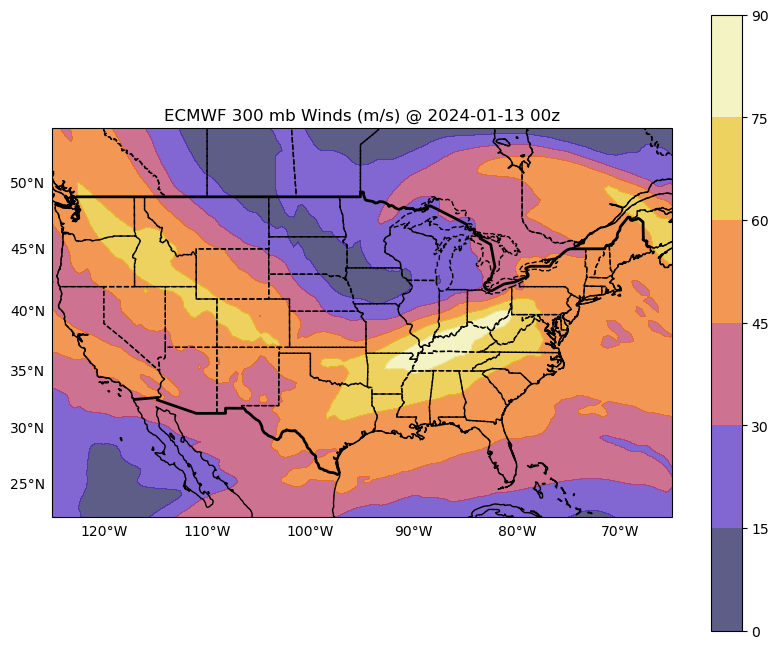

In [117]:
ax1 = mercplt(1,1)
dataproj=ccrs.PlateCarree()
mapwind = ax1.contourf(lon, lat, fwind300[0].values, transform=dataproj, alpha=0.7, cmap='CMRmap') 
plt.colorbar(mapwind, shrink=1, aspect=20)
ax1.set_title('ECMWF 300 mb Winds (m/s) @ 2024-01-13 00z')

In [118]:
fhr0u = []
fhr0v = []
#Creating a list of verification u and v values
for i in range(len(fhr0)):
    newfhr0u = fhr0[i].xarray(r":u:300:")
    newfhr0v = fhr0[i].xarray(r":v:300:")
    fhr0u.append(newfhr0u)
    fhr0v.append(newfhr0v)

/opt/conda/envs/meteo473_fa24/lib/python3.12/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


In [119]:
#Creating the verification wind dataset
verifwind = []
for i in range(len(fhr0)):
    newverifwind = np.sqrt(fhr0u[i].u**2 + fhr0v[i].v**2)
    verifwind.append(newverifwind)

In [120]:
#Calculating the absolute error between the analysis and the model for each forecast hour at the nearest gridpoint to KUNV
winderror = []
for i in range(len(fhr0)):
    newerror = abs(verifwind[i] - fwind300[i])
    winderror.append(newerror)

### Plotting Wind Absolute Error

In [121]:
ctpwinderror = []
for i in range(len(fhr0)):
    ctpwinderror.append(winderror[i].sel(latitude=40.8513,longitude=-77.8508,method='nearest'))

Text(0, 0.5, 'Wind Difference (m/s)')

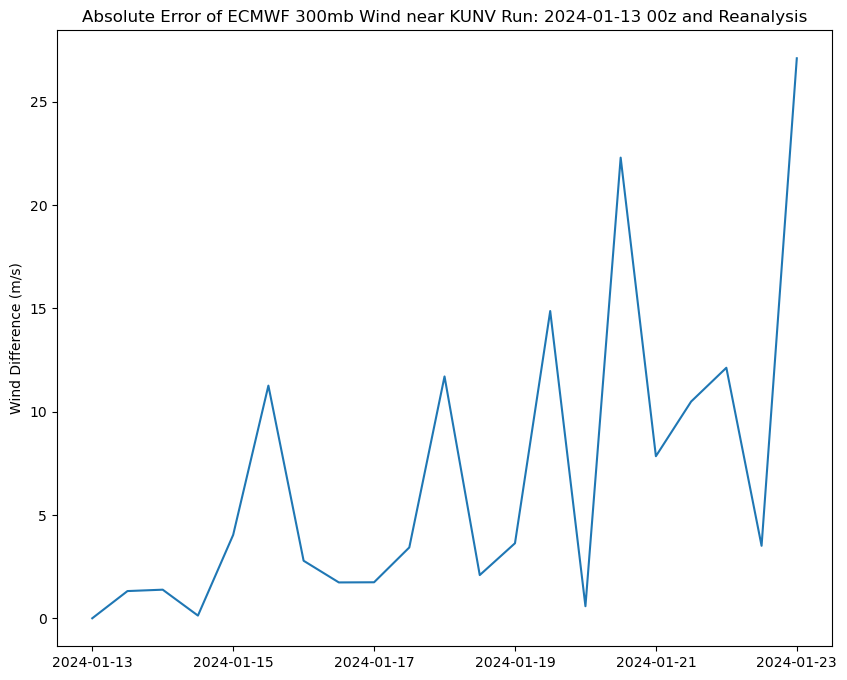

In [122]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(fwind300.valid_time, ctpwinderror)
ax.set_title('Absolute Error of ECMWF 300mb Wind near KUNV Run: 2024-01-13 00z and Reanalysis')
ax.set_ylabel('Wind Difference (m/s)')

### Calculating mean absolute error over three time ranges

Text(0.5, 1.0, 'Short Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

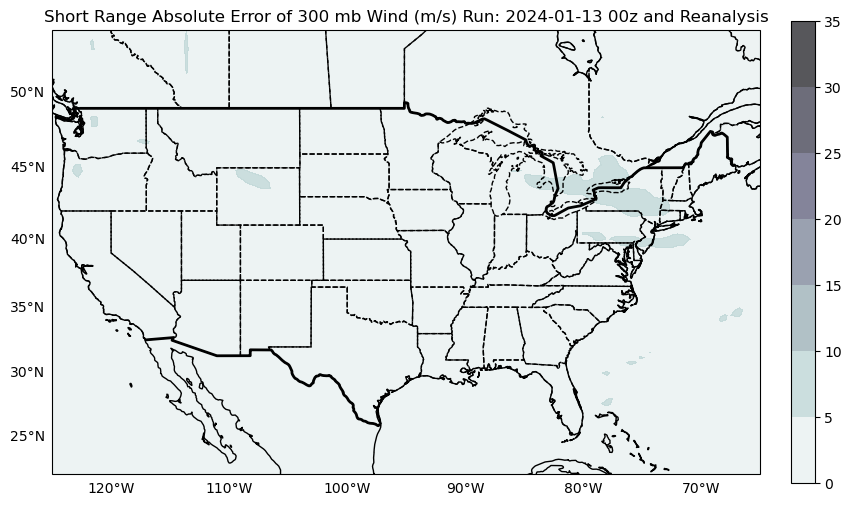

In [123]:
#Short range (fhr 6-60)
errsum = 0
for x in range(1,6):
    errsum = errsum + winderror[x]
shrerror = errsum/5
ax1 = mercplt(1,1)
maperr = ax1.contourf(lon, lat, shrerror, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,36,5))
plt.colorbar(maperr, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Short Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

Text(0.5, 1.0, 'Medium Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

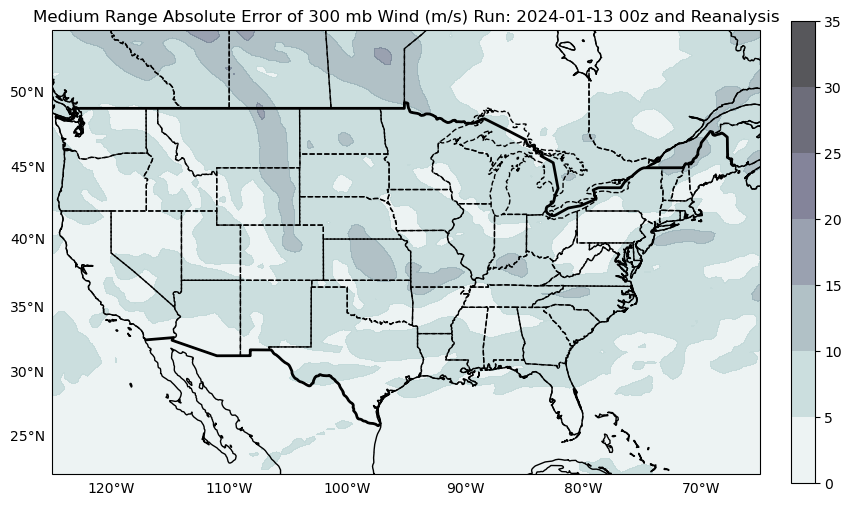

In [124]:
#Medium range (fhr 66-144)
errsum = 0
for x in range(7,13):
    errsum = errsum + winderror[x]
mederror = errsum/7
ax1 = mercplt(1,1)
maperr = ax1.contourf(lon, lat, mederror, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,36,5))
plt.colorbar(maperr, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Medium Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

Text(0.5, 1.0, 'Long Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

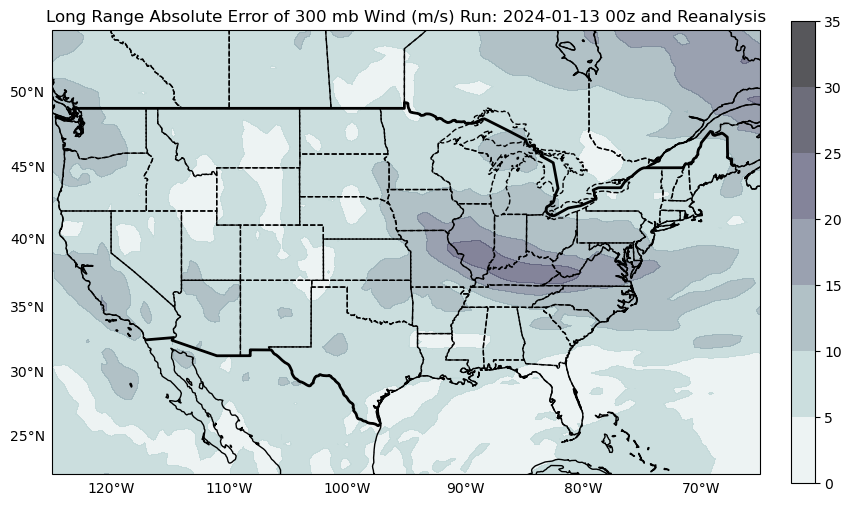

In [125]:
#Long range (fhr 152-240)
errsum = 0
for x in range(13,21):
    errsum = errsum + winderror[x]
lonerror = errsum/9
ax1 = mercplt(1,1)
maperr = ax1.contourf(lon, lat, lonerror, transform=dataproj, alpha=0.7, cmap='bone_r')
plt.colorbar(maperr, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Long Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

### Calculate Root Mean Square Error

In [126]:
RMSE = []
for x in range(len(fhr0)):
    newRMSE = np.sqrt(((fwind300[x] - verifwind[x]) ** 2).mean())
    RMSE.append(newRMSE)

Text(0.5, 1.0, 'Root Mean Square Error of ECMWF Run @ 2024-01-13 00z and Reanalysis')

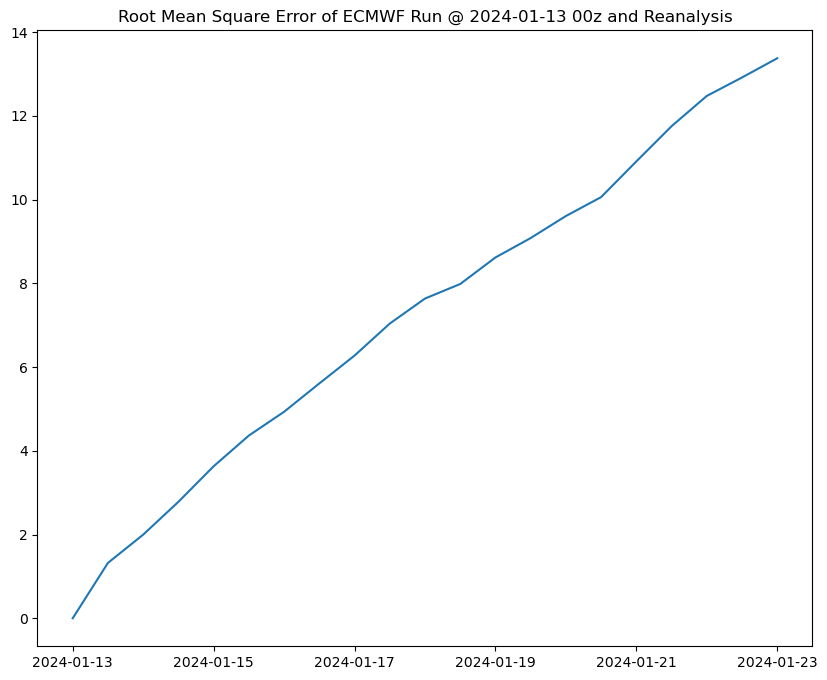

In [127]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(ds.valid_time, RMSE)
ax.set_title('Root Mean Square Error of ECMWF Run @ 2024-01-13 00z and Reanalysis')

### Repeat for another run

In [128]:
#Some code from MS1 written by Hunter, copied over and repurposed for another run by Meg
run2 = pd.Timestamp("2024-01-13T12", tz="utc").replace(tzinfo=None)
H2 = FastHerbie([run2], model="ifs", product="oper", fxx=np.arange(0,252,12).tolist())
#using the run from 12 hours later (12z on the 13th)

In [129]:
def verifset(y,m,d,h):
    """ Returns a ECMWF verification dataset of 10 days from the specified run date. """
    init = datetime(y,m,d,h)
    fhr = 12
    timeindex = 21
    atimes = []
    newdt = init
    atimes.append(newdt)
    for x in range(0, timeindex):
        newdt = newdt+timedelta(hours=fhr)
        atimes.append(newdt)
    fhr2=[]
    for x in range(0, timeindex):
        newinit = Herbie(atimes[x], model="ifs", product="oper", fxx=0, overwrite=True, save_dir="./data")
        fhr2.append(newinit)
    return fhr2

In [130]:
fhr2 = verifset(2024,1,13,12)
#code taken from above

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-13 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-14 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-14 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-15 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-15 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-16 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-16 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-17 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-17 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-18 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Jan-18 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=ifs ┊

/opt/conda/envs/meteo473_fa24/lib/python3.12/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


Text(0.5, 1.0, 'ECMWF 300 mb Winds @ 2024-01-13 12z')

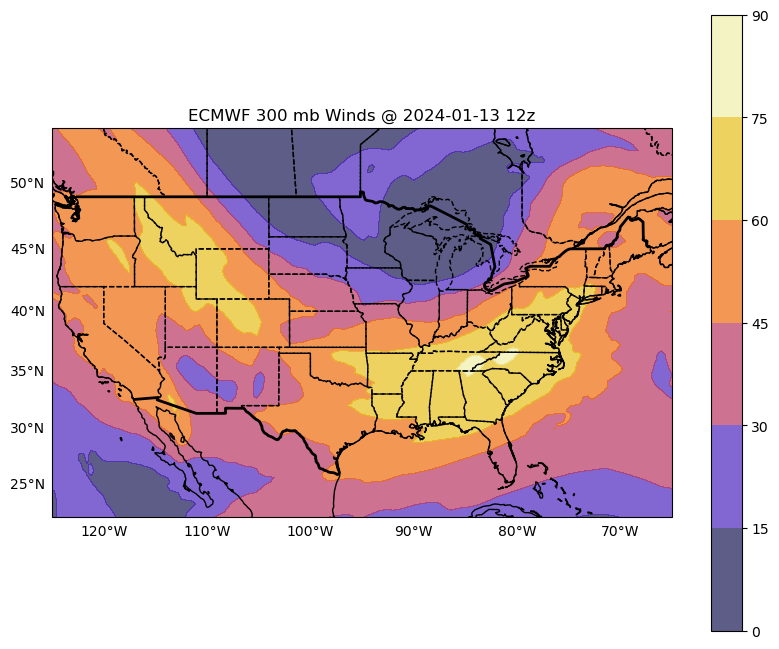

In [131]:
forecastu2 = H2.xarray(r":u:300:")
forecastv2 = H2.xarray(r":v:300:")

fwind300_2 = np.sqrt(forecastu2.u**2 + forecastv2.v**2)

ax1 = mercplt(1,1)
dataproj=ccrs.PlateCarree()
mapgh = ax1.contourf(lon, lat, fwind300_2[0].values, transform=dataproj, alpha=0.7, cmap='CMRmap') 
plt.colorbar(mapgh, shrink=1, aspect=20)
ax1.set_title('ECMWF 300 mb Winds @ 2024-01-13 12z')

In [132]:
fhr2u = []
fhr2v = []
#Creating a list of verification u and v values
for i in range(len(fhr2)):
    newfhr2u = fhr2[i].xarray(r":u:300:")
    newfhr2v = fhr2[i].xarray(r":v:300:")
    fhr2u.append(newfhr2u)
    fhr2v.append(newfhr2v)

#Creating the verification wind dataset
verifwind2 = []
for i in range(len(fhr2)):
    newverifwind2 = np.sqrt(fhr2u[i].u**2 + fhr2v[i].v**2)
    verifwind2.append(newverifwind2)

#Calculating the absolute error between the forecast and verification
winderror2 = []
for i in range(len(fhr2)):
    newerror2 = abs(verifwind2[i] - fwind300_2[i])
    winderror2.append(newerror2)

In [133]:
ctpwinderror2 = []
for i in range(len(fhr2)):
    ctpwinderror2.append(winderror2[i].sel(latitude=40.8513,longitude=-77.8508,method='nearest'))

Text(0, 0.5, 'Wind Difference (m/s)')

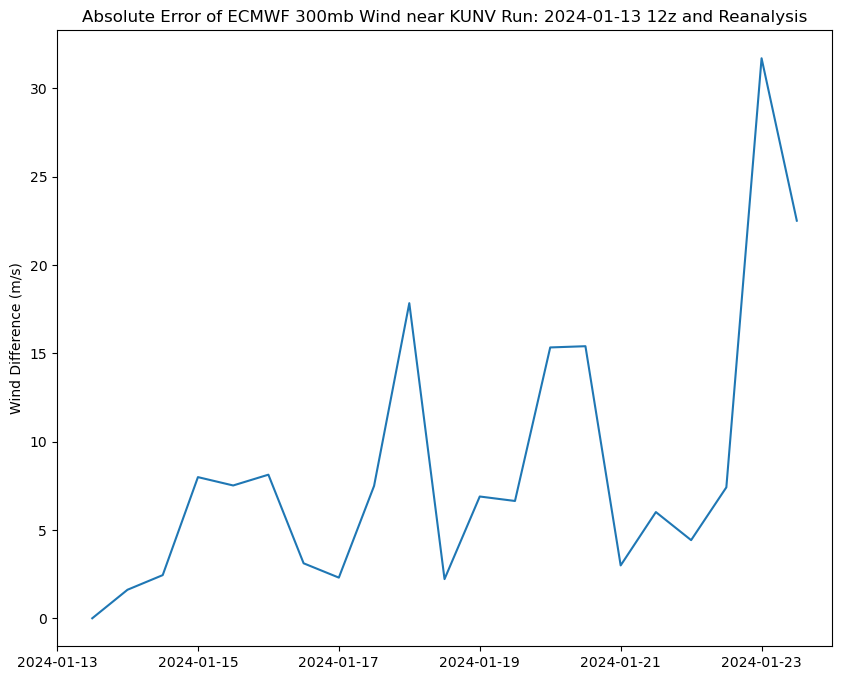

In [134]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(fwind300_2.valid_time,ctpwinderror2)
ax.set_title('Absolute Error of ECMWF 300mb Wind near KUNV Run: 2024-01-13 12z and Reanalysis')
ax.set_ylabel('Wind Difference (m/s)')

Text(0.5, 1.0, 'Long Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 12z and Reanalysis')

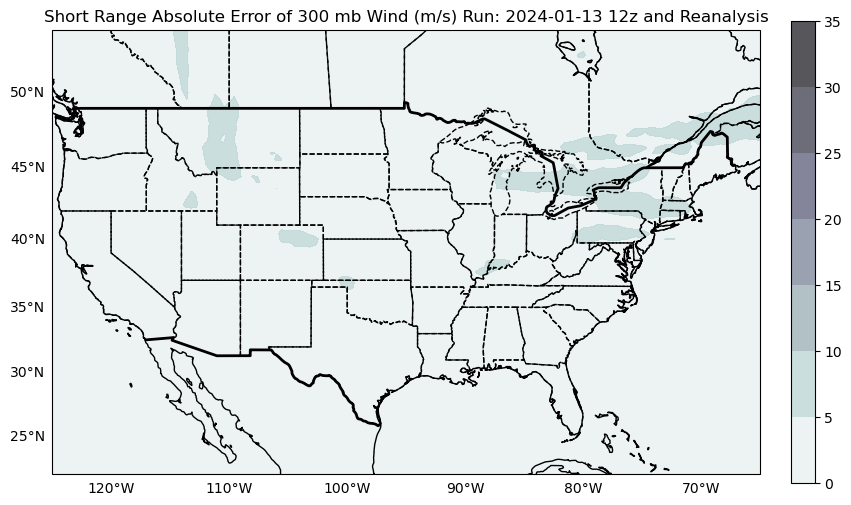

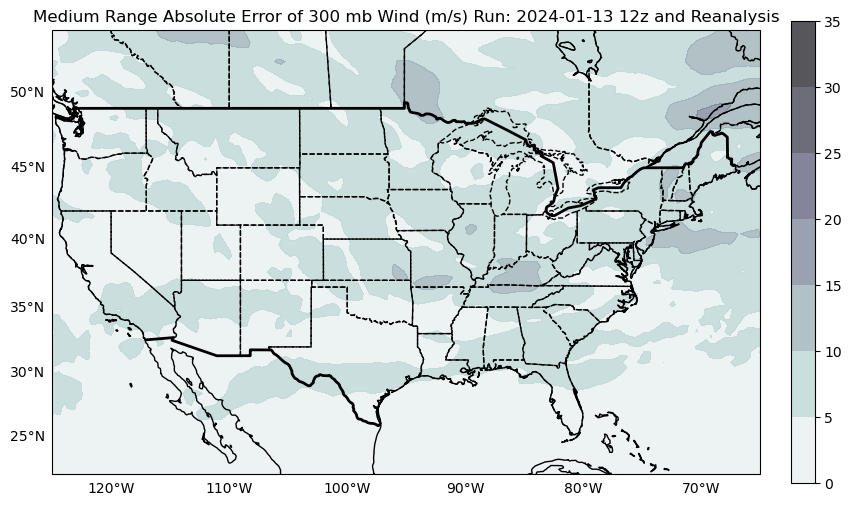

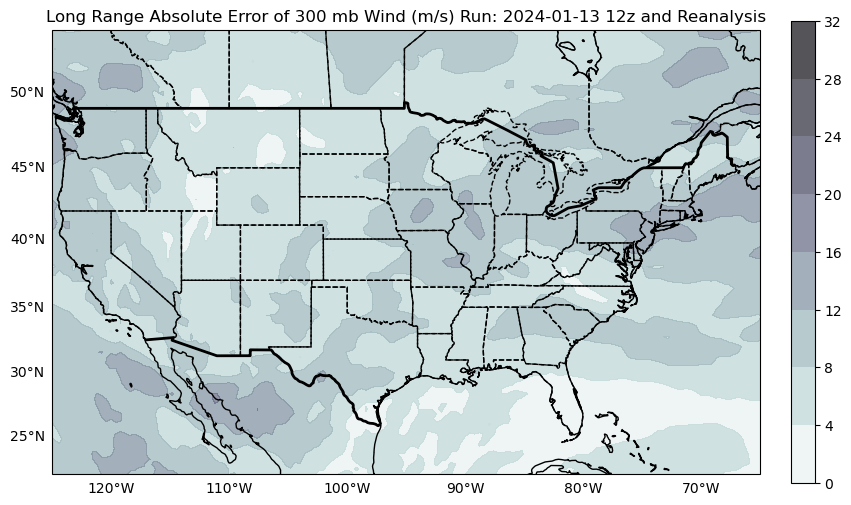

In [135]:
#Short range (fhr 6-60)
errsum = 0
for x in range(1,6):
    errsum = errsum + winderror2[x]
shrerror2 = errsum/5
ax1 = mercplt(1,1)
maperr2 = ax1.contourf(lon, lat, shrerror2, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,36,5))
plt.colorbar(maperr2, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Short Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 12z and Reanalysis')

#Medium range (fhr 66-144)
errsum = 0
for x in range(7,13):
    errsum = errsum + winderror2[x]
mederror2 = errsum/7
ax1 = mercplt(1,1)
maperr2 = ax1.contourf(lon, lat, mederror2, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,36,5))
plt.colorbar(maperr2, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Medium Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 12z and Reanalysis')

#Long range (fhr 152-240)
errsum = 0
for x in range(13,21):
    errsum = errsum + winderror2[x]
lonerror2 = errsum/9
ax1 = mercplt(1,1)
maperr2 = ax1.contourf(lon, lat, lonerror2, transform=dataproj, alpha=0.7, cmap='bone_r')
plt.colorbar(maperr2, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Long Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 12z and Reanalysis')

Text(0.5, 1.0, 'Root Mean Square Error of ECMWF 300mb Wind Run @ 2024-01-13 00z and 2024-01-13 12z and Reanalysis')

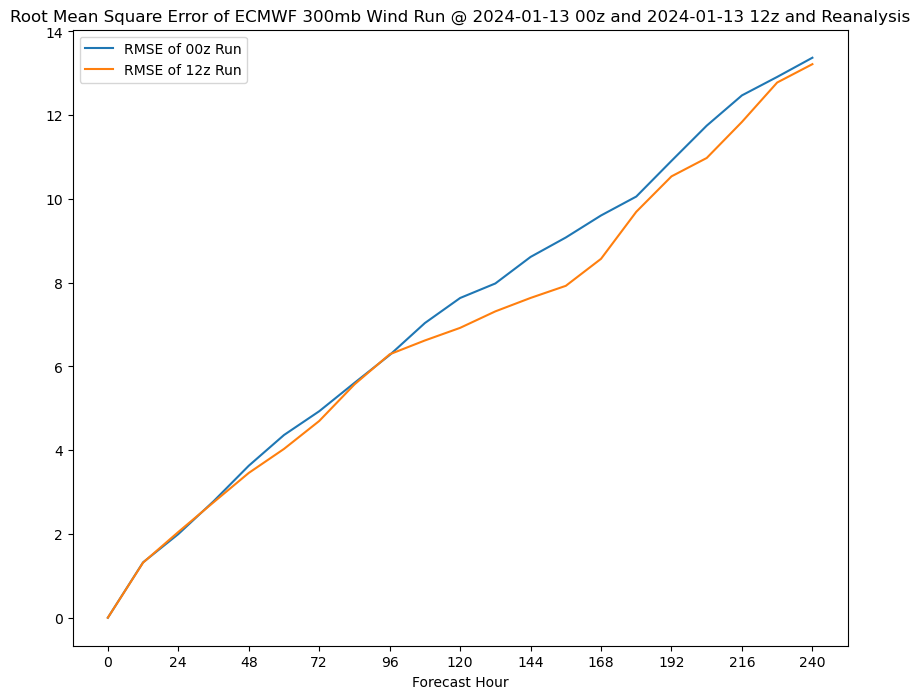

In [136]:
#Hunter
RMSE2 = []
for x in range(len(fhr2)):
    newRMSE2 = np.sqrt(((fwind300_2[x] - verifwind2[x]) ** 2).mean())
    RMSE2.append(newRMSE2)

fhrrange = range(0,252,12)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(fhrrange, RMSE, label='RMSE of 00z Run')
ax.plot(fhrrange, RMSE2, label='RMSE of 12z Run')
ax.legend()
ax.set_xticks(range(0,264,24))
ax.set_xlabel('Forecast Hour')
ax.set_title('Root Mean Square Error of ECMWF 300mb Wind Run @ 2024-01-13 00z and 2024-01-13 12z and Reanalysis')

### Glory Level: repeat for 10 runs

In [ ]:
#Meghan
#repeat download and fast herbie run for the next 10 runs
runs = [run + pd.Timedelta(hours=12)* i for i in range(10)]
H10 = FastHerbie(runs, model="ifs", product="oper", fxx=np.arange(0,252,12).tolist())

### Glory Level: Repeat Process for Another Parameter

In [137]:
#I (Meghan) repeated the process for 2m temperature
temp = H.xarray(r"2t")
t2m = temp['t2m'].values

In [138]:
#above is in kelvin, convert to celsius
t2mC = t2m - 273.15

Text(0.5, 1.0, 'ECMWF 2m Temperature (°C) @ 2024-01-13 00z')

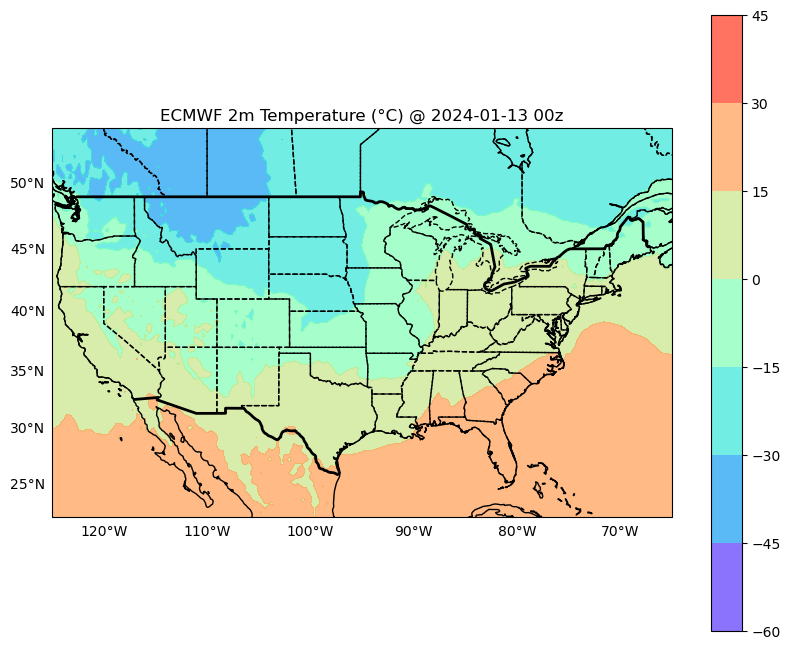

In [139]:
ax1 = mercplt(1,1)
dataproj=ccrs.PlateCarree()
mapgh = ax1.contourf(lon, lat, t2mC[0], transform=dataproj, alpha=0.7, cmap='rainbow') 
plt.colorbar(mapgh, shrink=1, aspect=20)
ax1.set_title('ECMWF 2m Temperature (°C) @ 2024-01-13 00z')

In [140]:
veriftemp = []
for i in range(len(fhr0)):
    newveriftemp = fhr0[i].xarray(r"2t")
    veriftemp.append(newveriftemp)


#Calculating the absolute error between the forecast and verification
temperror = []
for i in range(len(fhr0)):
    newerror_temp = abs(veriftemp[i]['t2m'] - temp['t2m'][i])
    temperror.append(newerror_temp)

In [141]:
temparray  = xr.concat(temperror, dim='valid_time')

In [142]:
errtemp = temparray.sel(latitude=40.8513,longitude=-77.8508,method='nearest')

Text(0, 0.5, 'Temperature Difference (deg C)')

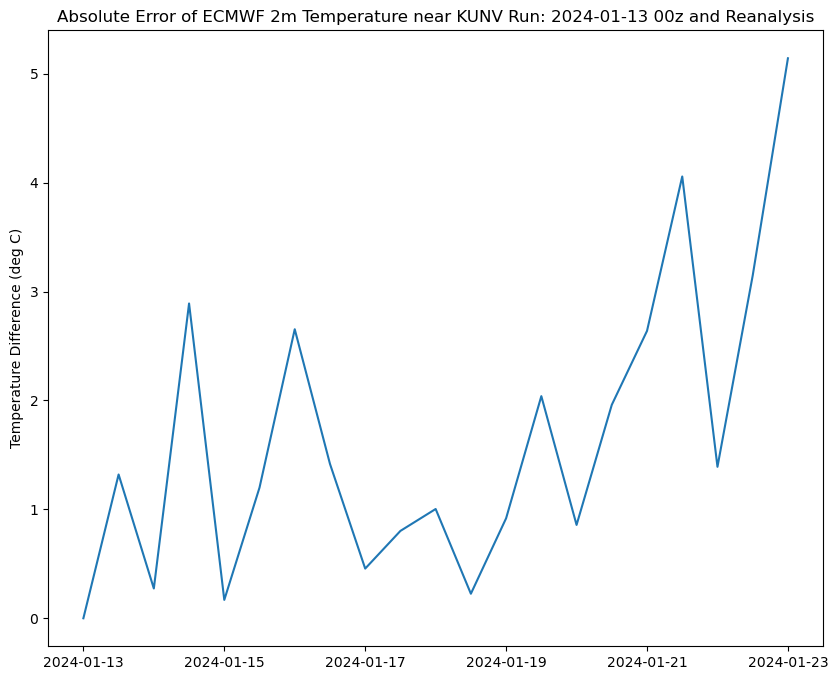

In [143]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(errtemp.valid_time, errtemp)
ax.set_title('Absolute Error of ECMWF 2m Temperature near KUNV Run: 2024-01-13 00z and Reanalysis')
ax.set_ylabel('Temperature Difference (deg C)')

Text(0.5, 1.0, 'Short Range Absolute Error of 2m Temperature (deg C) Run: 2024-01-13 12z and Reanalysis')

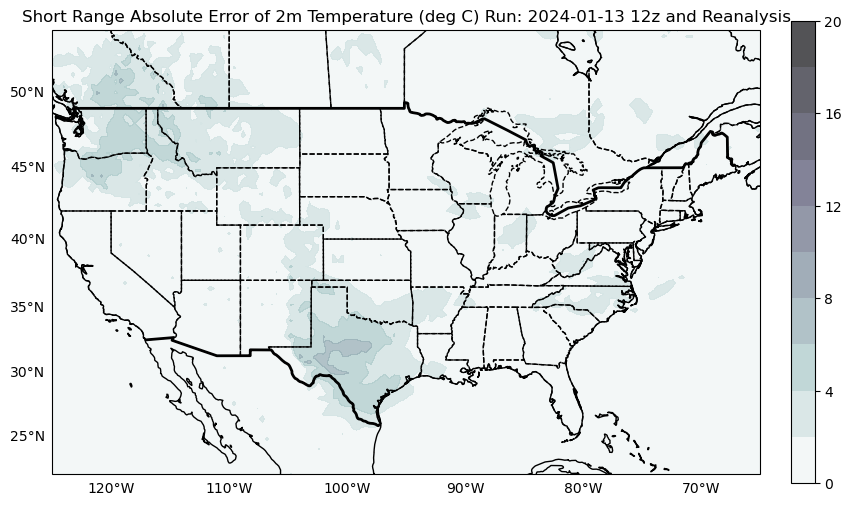

In [144]:
#Short Range
errsum = 0
for x in range(1,6):
    errsum = errsum + temperror[x]
shrerrortemp = errsum/5
ax1 = mercplt(1,1)
maperr_t = ax1.contourf(lon, lat, shrerrortemp, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,21,2))
plt.colorbar(maperr_t, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Short Range Absolute Error of 2m Temperature (deg C) Run: 2024-01-13 12z and Reanalysis')

Text(0.5, 1.0, 'Medium Range Absolute Error of 2m Temperature (deg C) Run: 2024-01-13 12z and Reanalysis')

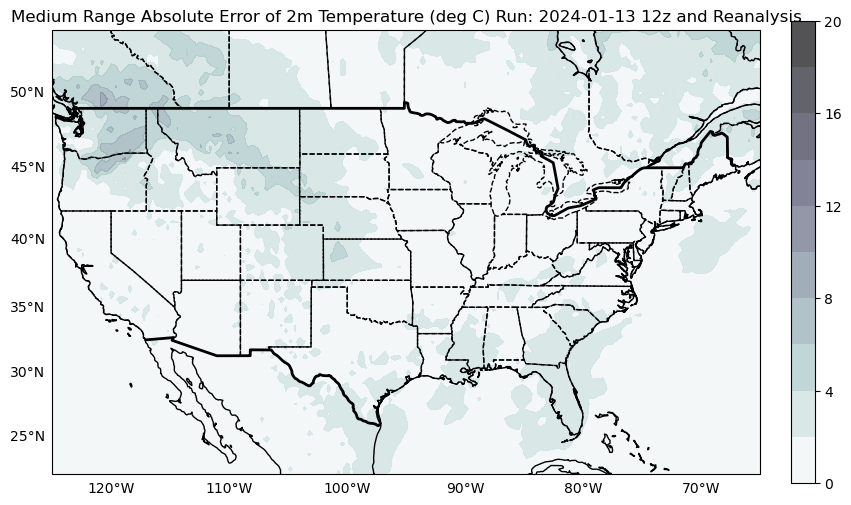

In [145]:
#Medium Range
errsum = 0
for x in range(7,13):
    errsum = errsum + temperror[x]
mederrortemp = errsum/7
ax1 = mercplt(1,1)
maperr_t = ax1.contourf(lon, lat, mederrortemp, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,21,2))
plt.colorbar(maperr_t, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Medium Range Absolute Error of 2m Temperature (deg C) Run: 2024-01-13 12z and Reanalysis')

Text(0.5, 1.0, 'Long Range Absolute Error of 2m Temperature (deg C) Run: 2024-01-13 12z and Reanalysis')

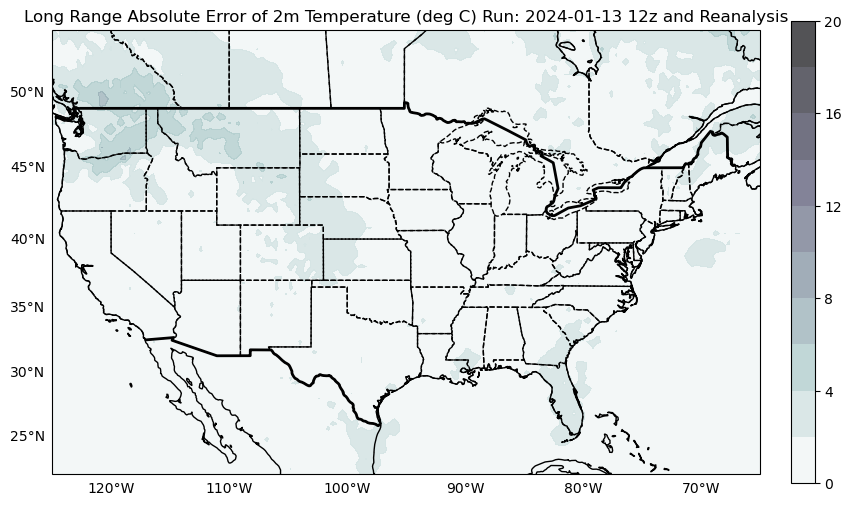

In [146]:
#Long Range
errsum = 0
for x in range(7,13):
    errsum = errsum + temperror[x]
lonerrortemp = errsum/9
ax1 = mercplt(1,1)
maperr_t = ax1.contourf(lon, lat, lonerrortemp, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,21,2))
plt.colorbar(maperr_t, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Long Range Absolute Error of 2m Temperature (deg C) Run: 2024-01-13 12z and Reanalysis')

Text(0.5, 1.0, 'Root Mean Square Error of ECMWF 2m Temperature Run @ 2024-01-13 00z and Reanalysis')

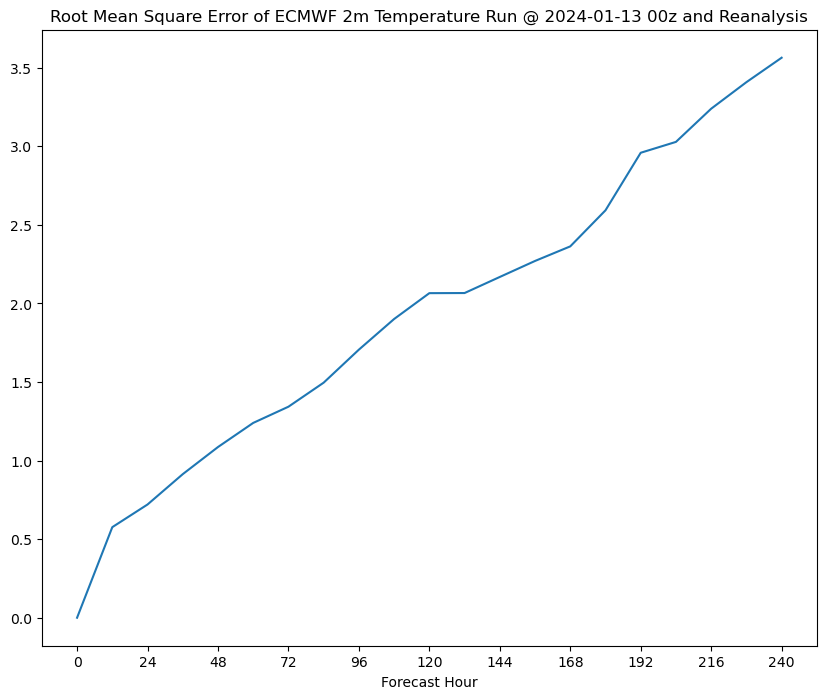

In [147]:
RMSE_t = []
for x in range(len(fhr0)):
    newRMSE_t = np.sqrt(((t2m[x] - veriftemp[x]) ** 2).mean())
    RMSE_t.append(newRMSE_t['t2m'].values)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(fhrrange, RMSE_t)
ax.set_xticks(range(0,264,24))
ax.set_xlabel('Forecast Hour')
ax.set_title('Root Mean Square Error of ECMWF 2m Temperature Run @ 2024-01-13 00z and Reanalysis')

### Glory Level: Repeat for Different Model (GFS)

In [148]:
#Meg; repeated process including download and verification for the GFS to compare to earlier procedures done with the euro
Hgfs = FastHerbie([run], model="gfs", fxx=np.arange(0,252,12).tolist(), save_dir='~/meteo473_groupwork/group2/data/')
gfs_u = Hgfs.xarray(r"UGRD:300")
gfs_v = Hgfs.xarray(r"VGRD:300")
lat = gfs_u.latitude.values
lon = gfs_u.longitude.values

In [149]:
fwind_gfs = np.sqrt(gfs_u.u**2 + gfs_v.v**2)

Text(0.5, 1.0, 'GFS 300 mb Winds (m/s) @ 2024-01-13 00z')

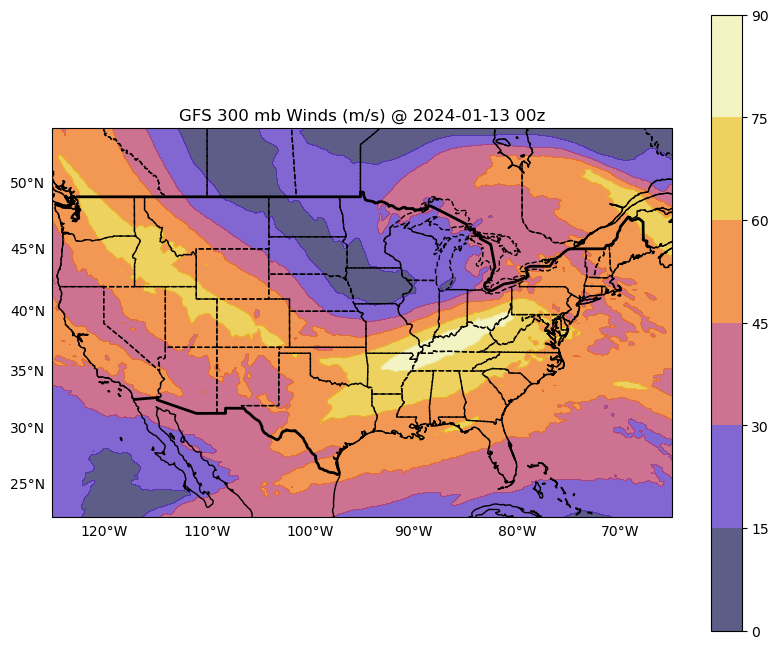

In [150]:
ax1 = mercplt(1,1)
dataproj=ccrs.PlateCarree()
mapwind = ax1.contourf(lon, lat, fwind_gfs[0].values, transform=dataproj, alpha=0.7, cmap='CMRmap') 
plt.colorbar(mapwind, shrink=1, aspect=20)
ax1.set_title('GFS 300 mb Winds (m/s) @ 2024-01-13 00z')

In [151]:
def verifset(y,m,d,h):
    """ Returns a GFS verification dataset of 10 days from the specified run date. """
    init = datetime(y,m,d,h)
    fhr = 12
    timeindex = 21
    atimes = []
    newdt = init
    atimes.append(newdt)
    for x in range(0, timeindex):
        newdt = newdt+timedelta(hours=fhr)
        atimes.append(newdt)
    fhr0_gfs=[]
    for x in range(0, timeindex):
        newinit = Herbie(atimes[x], model="gfs", fxx=0, overwrite=True, save_dir="./data")
        fhr0_gfs.append(newinit)
    return fhr0_gfs

fhr0_gfs = verifset(2024,1,13,0)

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-13 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-13 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-14 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-14 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-15 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-15 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-16 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-16 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-17 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-17 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Ja

In [152]:
fhr0u_gfs = []
fhr0v_gfs = []
#Creating a list of verification u and v values
for i in range(len(fhr0_gfs)):
    newfhr0u = fhr0_gfs[i].xarray(r"UGRD:300")
    newfhr0v = fhr0_gfs[i].xarray(r"VGRD:300")
    fhr0u_gfs.append(newfhr0u)
    fhr0v_gfs.append(newfhr0v)

In [153]:
verifwind_gfs = []
for i in range(len(fhr0_gfs)):
    newverifwind = np.sqrt(fhr0u_gfs[i].u**2 + fhr0v_gfs[i].v**2)
    verifwind_gfs.append(newverifwind)

In [154]:
winderror_gfs = []
for i in range(len(fhr0_gfs)):
    newerror = abs(verifwind_gfs[i] - fwind_gfs[i])
    winderror_gfs.append(newerror)

In [155]:
ctpwinderror_gfs = []
for i in range(len(fhr0_gfs)):
    ctpwinderror_gfs.append(winderror_gfs[i].sel(latitude=40.8513,longitude=-77.8508,method='nearest'))

Text(0, 0.5, 'Wind Difference (m/s)')

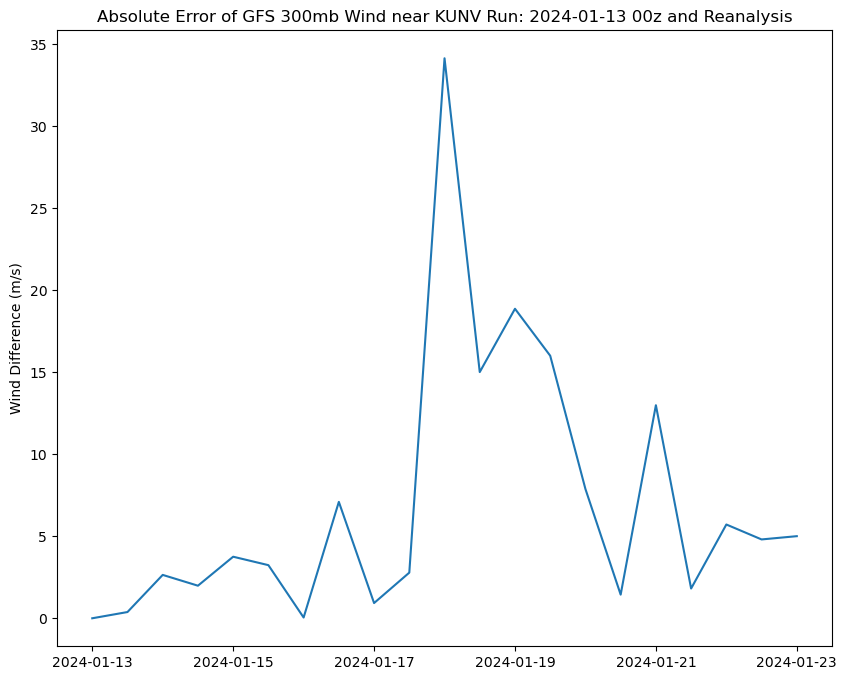

In [156]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(fwind_gfs.valid_time,ctpwinderror_gfs)
ax.set_title('Absolute Error of GFS 300mb Wind near KUNV Run: 2024-01-13 00z and Reanalysis')
ax.set_ylabel('Wind Difference (m/s)')

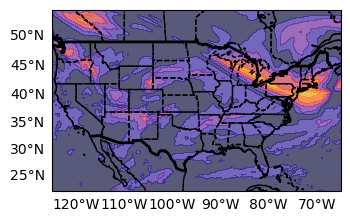

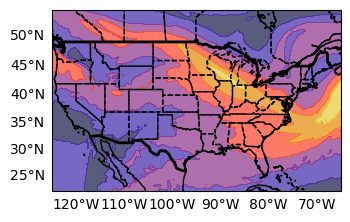

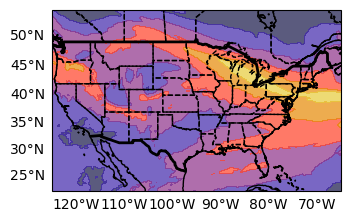

In [157]:
#In the above plot, we note a substantial spike around 1-18 00z. To see why, the maps for error along with the forecast and verification are below.
#Looking at the maps, we see that GFS misplaced the jet stream to the south, which caused substantial wind error in Pennsylvania. (Hunter)
ax1 = mercplt(3,1)
dataproj=ccrs.PlateCarree()
mapwind = ax1.contourf(lon, lat, winderror_gfs[10].values, transform=dataproj, alpha=0.7, cmap='CMRmap') 
ax2 = mercplt(3,2)
dataproj=ccrs.PlateCarree()
mapwind = ax2.contourf(lon, lat, fwind_gfs[10].values, transform=dataproj, alpha=0.7, cmap='CMRmap') 
ax3 = mercplt(3,3)
dataproj=ccrs.PlateCarree()
mapwind = ax3.contourf(lon, lat, verifwind_gfs[10].values, transform=dataproj, alpha=0.7, cmap='CMRmap') 

In [161]:
#Short range (fhr 6-60)
errsum = 0
for x in range(1,6):
    errsum = errsum + winderror_gfs[x]
shrerror = errsum/5

Text(0.5, 1.0, 'Short Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

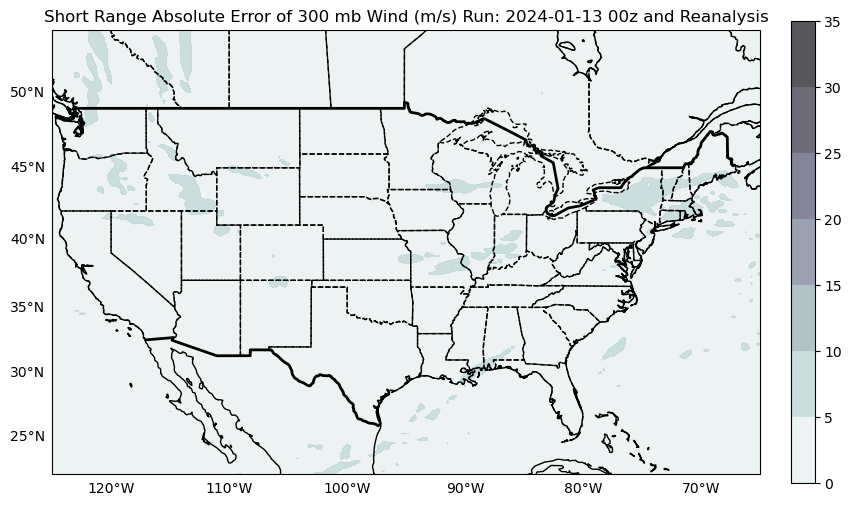

In [162]:
ax1 = mercplt(1,1)
maperr = ax1.contourf(lon, lat, shrerror, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,36,5))
plt.colorbar(maperr, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Short Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

In [163]:
#Medium range (fhr 66-144)
errsum = 0
for x in range(7,13):
    errsum = errsum + winderror_gfs[x]
mederror = errsum/7

Text(0.5, 1.0, 'Medium Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

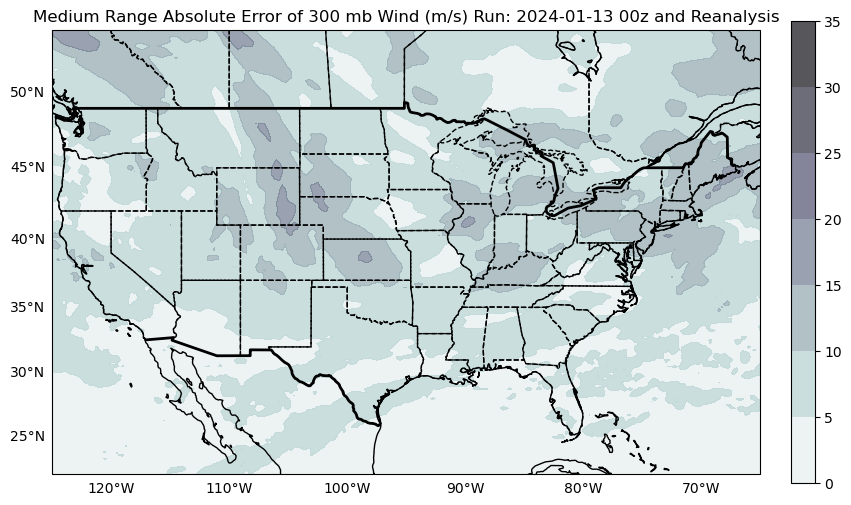

In [164]:
ax1 = mercplt(1,1)
maperr = ax1.contourf(lon, lat, mederror, transform=dataproj, alpha=0.7, cmap='bone_r', levels=np.arange(0,36,5))
plt.colorbar(maperr, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Medium Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

In [165]:
#Long range (fhr 152-240)
errsum = 0
for x in range(13,21):
    errsum = errsum + winderror_gfs[x]
lonerror = errsum/9

Text(0.5, 1.0, 'Long Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

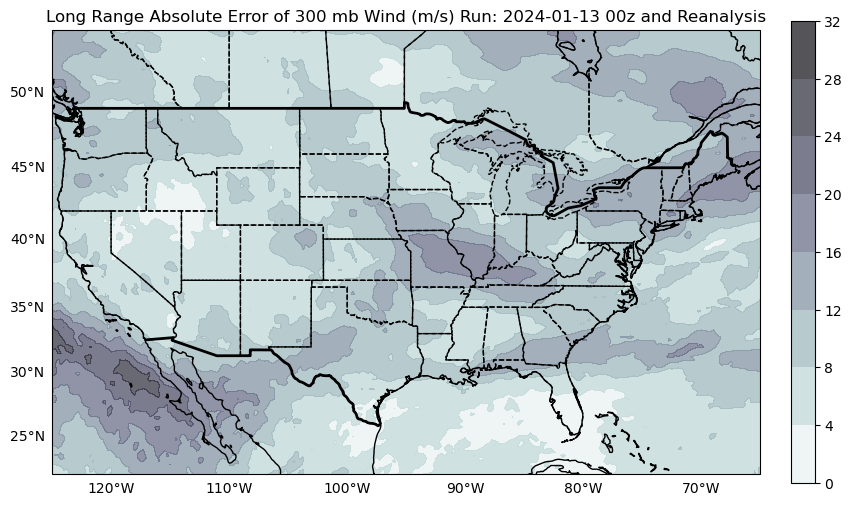

In [166]:
ax1 = mercplt(1,1)
maperr = ax1.contourf(lon, lat, lonerror, transform=dataproj, alpha=0.7, cmap='bone_r')
plt.colorbar(maperr, fraction=0.046, pad=0.04, shrink=0.75)
ax1.set_title('Long Range Absolute Error of 300 mb Wind (m/s) Run: 2024-01-13 00z and Reanalysis')

In [158]:
RMSE_GFS = []
for x in range(len(fhr0)):
    newRMSE = np.sqrt(((fwind_gfs[x] - verifwind_gfs[x]) ** 2).mean())
    RMSE_GFS.append(newRMSE)

Text(0.5, 1.0, 'Root Mean Square Error of GFS Run @ 2024-01-13 00z and Reanalysis')

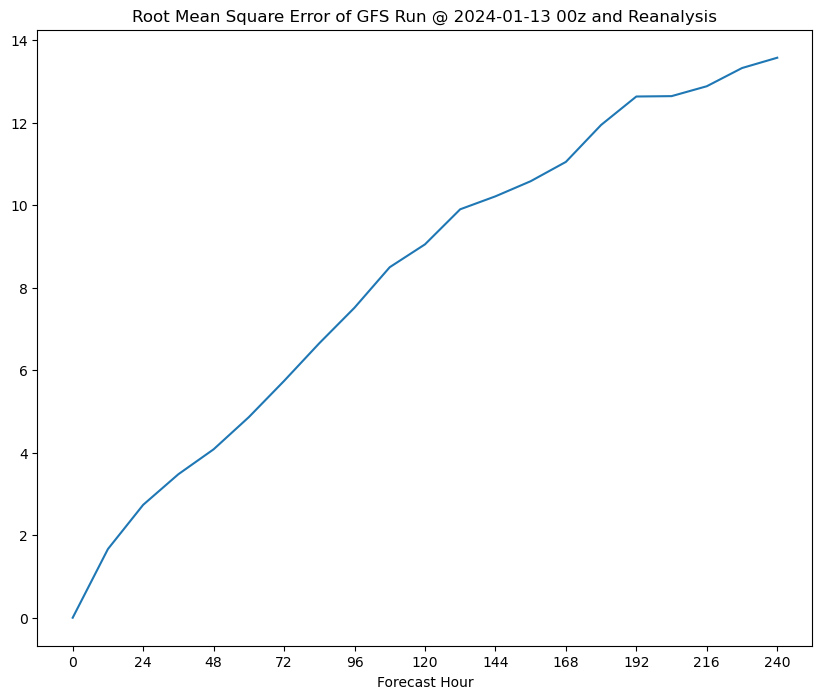

In [159]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xticks(range(0,264,24))
ax.set_xlabel('Forecast Hour')
ax.plot(fhrrange, RMSE_GFS)
ax.set_title('Root Mean Square Error of GFS Run @ 2024-01-13 00z and Reanalysis')

Text(0.5, 1.0, 'Root Mean Square Error of ECMWF vs GFS 300 mb wind @ 2024-01-13 00z and Reanalysis')

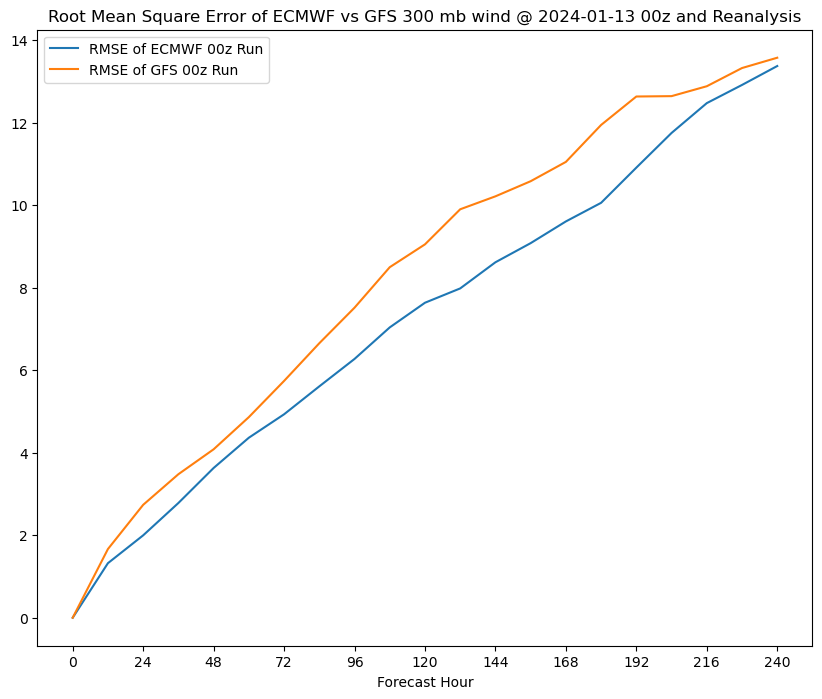

In [160]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(fhrrange, RMSE, label='RMSE of ECMWF 00z Run')
ax.plot(fhrrange, RMSE_GFS, label='RMSE of GFS 00z Run')
ax.set_xticks(range(0,264,24))
ax.set_xlabel('Forecast Hour')
ax.legend()
ax.set_title('Root Mean Square Error of ECMWF vs GFS 300 mb wind @ 2024-01-13 00z and Reanalysis')